# Detector de Distancia Social con YOLO
### YOLO Versions Effectively Oriented for people counting & social distance detection.

### En este script se desarrollará el código para el cálculo de la distancia social y la posterior advertencia.



In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!ls

sample_data


In [1]:
# Montamos el drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Configuración openCV + CUDA

Fin Configuración


In [3]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Case Study v2.gdoc'		     Trabajo
'Colab Notebooks'		    'Trabajo Final ITIS'
 darknet			    'Trabajo Java Clinica'
 Grupo01-Scripts_IAA_2doAvance.zip   UESAN
 obj.names			     yolov3
 Otros				     yolov3_custom.cfg
'Proyecto Robótica'		     yolov3_custom_last.weights
 Proyectos			     yolov3ppl
 robA_2018_I_HanaList


In [ ]:
#!cp -r /mydrive/yolov3ppl/socialD_detector ./

In [ ]:
#%cd socialD_detector/
#!ls

/content/socialD_detector
gamarra02.mp4	 pyimagesearch		      yolo-coco
pedestrians.mp4  social_distance_detector.py  yolo-ppl



Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Este código hará click en la pantalla cada 10 minutos para que Colab no te expulse por estar inactivo. 



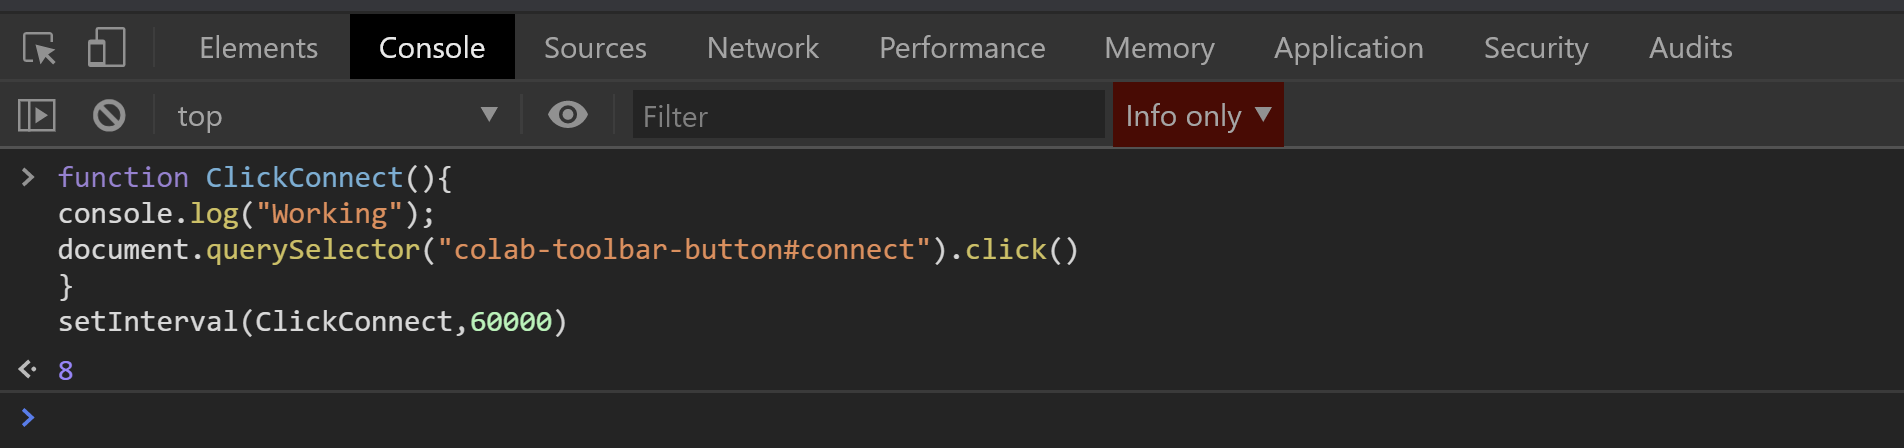

In [ ]:
#!python social_distance_detector.py --input gamarra02.mp4 --output output_03.avi --display 0

[INFO] loading YOLO from disk...
[INFO] accessing video stream...


## Construyendo el código

In [4]:
def imShow_02(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(width, height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(14, 6)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [5]:
!ls

bin					   etc	  mydrive  swift
boot					   home   opt	   sys
content					   lib	  proc	   tensorflow-1.15.2
datalab					   lib32  root	   tmp
dev					   lib64  run	   tools
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  sbin	   usr
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  srv	   var


In [6]:
%cd content/
#%cd ..
!ls

/content
gdrive	sample_data


In [7]:
# Copiamos modelo YOLO a el VM de colab
!cp -r /mydrive/yolov3ppl/socialD_detector/yolo-ppl ./

In [15]:
%cd yolo-ppl
!ls

[Errno 2] No such file or directory: 'yolo-ppl'
/content/yolo-ppl
gamarra02.mp4  output_2.mp4	yolov3_custom-c1.cfg
imagen1.jpg    output.mp4	yolov3_custom-c1_last.weights
imagen2.jpg    pedestrians.mp4	yolov4_det_best.weights
obj.names      pplCounterTest	yolov4_det.cfg
output_01.mp4  video01.mp4


In [14]:
import cv2
import numpy as np
import os

In [ ]:
cv2.__version__

'4.1.2'

In [16]:
# Cargamos nuestro modelo
weights =  "yolov3_custom-c1_last.weights" #"yolov4_det_best.weights"
cfg =  "yolov3_custom-c1.cfg" #"yolov4_det.cfg"

net = cv2.dnn.readNet(weights,cfg)

In [ ]:
USE_GPU=True
if USE_GPU:
    # set CUDA as the preferable backend and target
    print("[INFO] setting preferable backend and target to CUDA...")
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)


['person']


In [17]:
#classes = ['person']
classes = []
with open ("obj.names","r") as f:
  classes = [line.strip() for line in f.readlines()]

print(classes)

['person']


In [18]:
# Cargamos las capas
layerNames = net.getLayerNames()
outputLayers = [layerNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

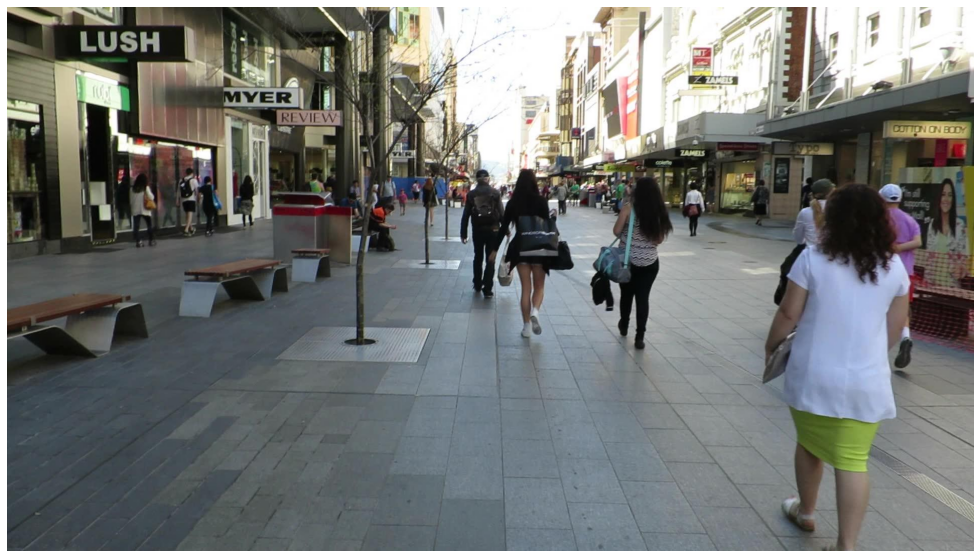

In [ ]:
# Cargamos una imagen
imShow("imagen1.jpg")

# En un cuaderno de ipynb local:
#imagen = cv2.imread("imagen1.jpg")
#cv2.imshow("Image", imagen)
#cv2.waitKey(0)
#cv2.destroyAllWindows




In [ ]:
# Detectamos las instancias objeto persona

# Cargamos imagen de nuevo
img = cv2.imread("imagen1.jpg")
#img = cv2.resize(img, None, fx = 0.6, fy=0.8)
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, size, (0,0,0), True, crop = False) # El true explica que se debe cambiar de BGR a RGB

# Mostramos blobs
#for i in blob:
  #for n, img_bleb in enumerate(i):
    # tendremos como resultado 3 blobs, uno por cada canal RGB
    #imShow_02(img_bleb)


In [19]:
# Determinamos el tamaño de entrada que usa el modelo, en caso de YOLOv3 es 416x416
size = (608,608) #(416,416)

# Asignamos un umbral
thresh = 0.3

# Distancia mínima en pixeles
min_dist = 100 #230 #100

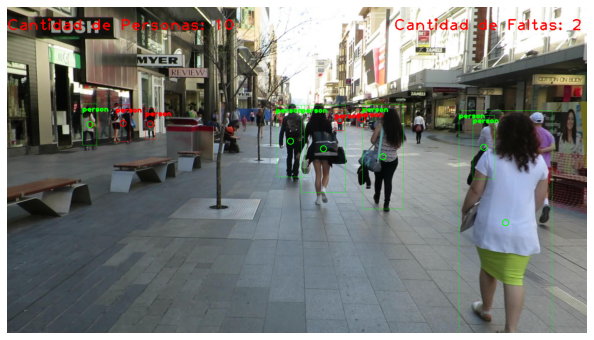

In [20]:
# Cargamos imagen de nuevo
img = cv2.imread("imagen1.jpg")

def Social_distance_detection(frame):

  height, width, channels = frame.shape

  # Determinamos el tamaño de entrada que usa el modelo, en caso de YOLOv3 es 416x416
  size = (608,608) # (416,416)

  blob = cv2.dnn.blobFromImage(frame, 0.00392, size, (0,0,0), True, crop = False) # El true explica que se debe cambiar de BGR a RGB

  # Continuamos, asignamos el Blob al modelo
  net.setInput(blob)
  outs = net.forward(outputLayers)
  #print(outs) # Nos da como resultado las detecciones

  # Creamos contenedores para los valores 
  class_ids = []
  confidences = []
  boxes = []
  centroids = []
  faultsDS = []

  # Mostramos la info en la pantalla:
  for out in outs:
    for det in out:
      scores = det[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > thresh:
        # Persona Detectada
        # Se obtiene el centro, altura y ancho del objeto
        center_x = int(det[0] * width)
        center_y = int(det[1] * height)
        w = int(det[2] * width)
        h = int(det[3] * height)

        # Coordenadas Rectágulo

        x = int(center_x - w / 2)
        y = int(center_y - h / 2)

        # Agregamos los valores de la detección a las listas: coordenadas, confidence
        centroids.append([center_x, center_y])
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)

  # Asignaciones ...
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, thresh, 0.5)
  num_ppl_det = len(indexes)
  font = cv2.FONT_HERSHEY_PLAIN


  #Calculamos distancia euclidiana de los centroides

  distans = []
  cont = 0
  #for i in range(0, len(centroids)):
    #for j in range(i+1, len(centroids)):
  for i in range(0,len(boxes)):
    for j in range(i+1, len(boxes)):
      if i in indexes and j in indexes:
        distance = np.linalg.norm(np.array(centroids[i]) - np.array(centroids[j]))
        distans.append(distance)

        if distance < min_dist:
          center_x, center_y = centroids[i]
          faultsDS.append([center_x, center_y])
          cont += 1
          if centroids[j] != centroids[i]:
            center_x, center_y = centroids[j]
            faultsDS.append([center_x, center_y])

  # Dibujamos los rectángulos y centroides

  for k in range(len(boxes)):
    if k in indexes and num_ppl_det > 0:
      
      center_x, center_y = centroids[k]
      x, y, w, h = boxes[k]
      label = "person"

      color = (0, 255, 0)

      if centroids[k] in faultsDS:
          color = (0, 0, 255)

      # Colocamos un círculo en el centro de las detecciones
      cv2.circle(frame, (center_x, center_y), 10, color, 2)

      # Coords top, bot y color
      cv2.rectangle(frame, (x,y), (x + w, y + h), color)

      #Colocamos texto en la imagen:
      cv2.putText(frame, label, (x, y + 25), font, 1.5, color, 3)

  cv2.putText(frame, "Cantidad de Personas: {}".format(num_ppl_det), (0,80), font, 3.5, (0,0,255), 3)
  cv2.putText(frame, "Cantidad de Faltas: {}".format(int(len(faultsDS)//2)), (1280,80), font, 3.5, (0,0,255), 3)
  
  return frame


# Ejecutamos la función 
image = Social_distance_detection(img)

imShow_02(image)


# Error sucede porque el loop de centroids no tiene en cuenta los indexes predefinidos

### Detección de Video

In [21]:
# Código para detección en video:
%matplotlib inline
%pylab inline

import cv2
from matplotlib import pyplot, pylab

from IPython.display import clear_output #Ayudar a hacer un refresh

import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
video = cv2.VideoCapture("gamarra02.mp4")

In [24]:
# Metadata del video

# Ancho o alto del video - Resolución
ancho = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
alto = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
wh = (ancho, alto)

# Ratio, frames por segundo - FPS
fps = int(video.get(cv2.CAP_PROP_FPS))
fps

# Extensión que se utilizará, definiendo los codecs
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')

# Se almacena el video de salida, pero solo con la metadata, no hay un video
out = cv2.VideoWriter("output.mp4", fourcc, fps, wh)

# Cantidad de Frames
frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frames

min_dist = 200 

In [25]:
video = cv2.VideoCapture("gamarra02.mp4")

# Se puede ir variando los fps y eso hará que el video sea más fluido y por ende más rápido, menos tiempo
out = cv2.VideoWriter("output_02.mp4", fourcc, fps, wh)


for i in range(frames):
    
    ret, frame = video.read()
    
    # Detectamos distanciamiento social
    frame = Social_distance_detection(frame)
    
    out.write(frame)
    
video.release()
out.release()

In [26]:
!cp ./output_02.mp4 /mydrive/yolov3ppl/socialD_detector/yolo-ppl

### Detección en WebCam

## Conteo de Personas - Validación

In [ ]:
thresh = 0.25

In [ ]:
def people_counter(frame):

  height, width, channels = frame.shape

  # Determinamos el tamaño de entrada que usa el modelo, en caso de YOLOv3 es 416x416
  size = (608,608) # (416,416)

  blob = cv2.dnn.blobFromImage(frame, 0.00392, size, (0,0,0), True, crop = False) # El true explica que se debe cambiar de BGR a RGB

  # Continuamos, asignamos el Blob al modelo
  net.setInput(blob)
  outs = net.forward(outputLayers)
  #print(outs) # Nos da como resultado las detecciones

  # Creamos contenedores para los valores 
  class_ids = []
  confidences = []
  boxes = []


  # Mostramos la info en la pantalla:
  for out in outs:
    for det in out:
      scores = det[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > thresh:
        # Persona Detectada
        # Se obtiene el centro, altura y ancho del objeto
        center_x = int(det[0] * width)
        center_y = int(det[1] * height)
        w = int(det[2] * width)
        h = int(det[3] * height)

        # Coordenadas Rectágulo

        x = int(center_x - w / 2)
        y = int(center_y - h / 2)

        # Agregamos los valores de la detección a las listas: coordenadas, confidence
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))

  # Asignaciones ...
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, thresh, 0.5)
  num_ppl_det = len(indexes)

  return num_ppl_det

In [ ]:
import os
import pandas as pd

In [ ]:
!ls

conteoYOLO.xlsx  output_01.mp4	  video01.mp4
gamarra02.mp4	 output_2.mp4	  yolov3_custom-c1.cfg
imagen1.jpg	 output.mp4	  yolov3_custom-c1_last.weights
imagen2.jpg	 pedestrians.mp4  yolov4_det_best.weights
obj.names	 pplCounterTest   yolov4_det.cfg


In [ ]:
# Cargamos las imágenes en una lista
listaImg = os.listdir("pplCounterTest")

In [ ]:
ruta = os.getcwd() + os.sep + "pplCounterTest"

In [ ]:
listaConteo = []
listaNom = []
for i in listaImg:
  img = cv2.imread(ruta+os.sep+i)
  cont = people_counter(img)
  listaConteo.append(cont)
  listaNom.append(i)

In [ ]:
data = pd.DataFrame()
data['Nombre'] = listaNom
data['ConteoYolo'] = listaConteo
data.head()



,Nombre,ConteoYolo
0,"273271,1f3ca000086fb919.jpg",6
1,000318.jpg,9
2,000413.jpg,10
3,000194.jpg,13
4,"273271,1be0200037d3046d.jpg",6


In [ ]:
data.to_excel("conteoYOLO2.xlsx")

## Detection en BirdView


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [36]:
# Cargamos imagen de nuevo
img = cv2.imread("imagen1.jpg")

# Dimensiones
#height, width, channels = img.shape
h = img.shape[0]
w = h//2


In [98]:
def ppl_boxes(frame):

  height, width, channels = frame.shape

  # Determinamos el tamaño de entrada que usa el modelo, en caso de YOLOv3 es 416x416
  size = (608,608) # (416,416)

  blob = cv2.dnn.blobFromImage(frame, 0.00392, size, (0,0,0), True, crop = False) # El true explica que se debe cambiar de BGR a RGB

  # Continuamos, asignamos el Blob al modelo
  net.setInput(blob)
  outs = net.forward(outputLayers)
  #print(outs) # Nos da como resultado las detecciones

  # Creamos contenedores para los valores 
  class_ids = []
  confidences = []
  boxes = []
  centroids = []

  # Mostramos la info en la pantalla:
  for out in outs:
    for det in out:
      scores = det[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > thresh:
        # Persona Detectada
        # Se obtiene el centro, altura y ancho del objeto
        center_x = int(det[0] * width)
        center_y = int(det[1] * height)
        w = int(det[2] * width)
        h = int(det[3] * height)

        # Coordenadas Rectágulo

        x = int(center_x - w / 2)
        y = int(center_y - h / 2)

        # Agregamos los valores de la detección a las listas: coordenadas, confidence
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        centroids.append([center_x, center_y])

  # Asignaciones ...
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, thresh, 0.5)
  num_ppl_det = len(indexes)

  return centroids, boxes, indexes

In [196]:
# Coordenadas de puntos en la posición inicial
#pts1 = np.float32([[875, 377],[1137, 377],[0,1079],[1915, 1079]])
#pts1 = np.float32([[527, 295],[1500, 295],[0,1079],[1915, 1079]])
pts1 = np.float32([[527, 295],[1500, 295],[500,1080],[1915, 1080]])

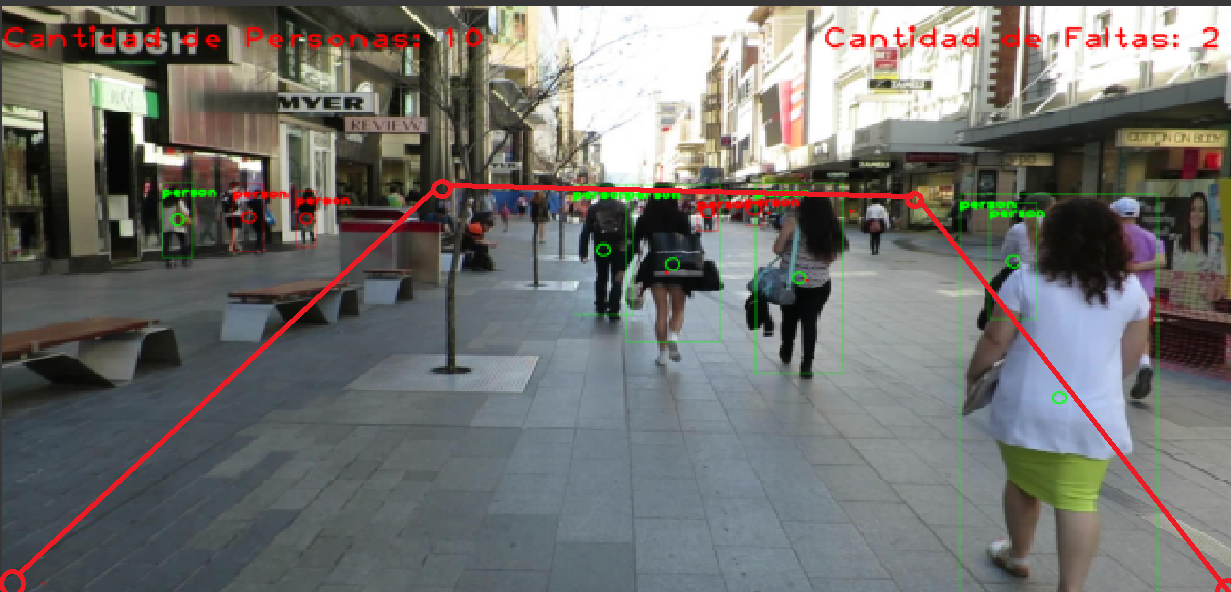

In [197]:
def get_camera_perspective(img, src_points):
    IMAGE_H = img.shape[0]
    IMAGE_W = img.shape[1]
    src = src_points
    dst = np.float32([[0, IMAGE_H], [IMAGE_W, IMAGE_H], [0, 0], [IMAGE_W, 0]])

    M = cv2.getPerspectiveTransform(src, dst)
    M_inv = cv2.getPerspectiveTransform(dst, src)

    return M, M_inv

In [198]:
M, M_inv = get_camera_perspective(img, pts1)

In [126]:
centroids, boxes, index = ppl_boxes(img)

In [128]:
centroids

[[1650, 715],
 [274, 391],
 [384, 387],
 [943, 445],
 [1046, 472],
 [1578, 466],
 [1244, 497],
 [1100, 378],
 [1176, 373],
 [474, 389]]

In [130]:
len(centroids)

10

In [132]:
centroids

[[1650, 715],
 [274, 391],
 [384, 387],
 [943, 445],
 [1046, 472],
 [1578, 466],
 [1244, 497],
 [1100, 378],
 [1176, 373],
 [474, 389]]

In [202]:
def plot_points_on_bird_eye_view(frame, centroids, M, scale_w, scale_h):
    frame_h = frame.shape[0]
    frame_w = frame.shape[1]

    node_radius = 10
    color_node = (192, 133, 156)
    thickness_node = 20
    solid_back_color = (41, 41, 41)

    blank_image = np.zeros((int(frame_h * scale_h), int(frame_w * scale_w), 3), np.uint8)
    blank_image[:] = solid_back_color
    warped_pts = []
    for i in range(len(centroids)):

        center_x = centroids[i][0]
        center_y = centroids[i][1]

        pts = np.array([[[center_x, center_y]]], dtype="float32")
        warped_pt = cv2.perspectiveTransform(pts, M)[0][0]
        warped_pt_scaled = [int(warped_pt[0] * scale_w), int(warped_pt[1] * scale_h)]

        warped_pts.append(warped_pt_scaled)

        bird_image = cv2.circle(
            blank_image,
            (warped_pt_scaled[0], warped_pt_scaled[1]),
            node_radius,
            color_node,
            thickness_node,
        )

    return warped_pts, bird_image

In [175]:
scale_w = 1.7 / 2
scale_h = 2.5 / 2

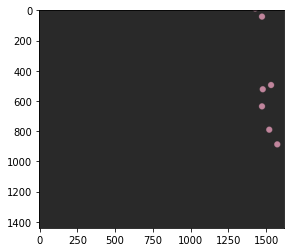

In [239]:
scale_w = 1.5 / 2
scale_h = 3 / 2

warped_pts, bird_image = plot_points_on_bird_eye_view(img, boxes, M, scale_w, scale_h)
#bird_image = np.fliplr(bird_image)
bird_image= cv2.rotate(bird_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(bird_image)
plt.show()

In [156]:
warped_pts

[[2049, 476],
 [-541, 503],
 [-305, 499],
 [822, 520],
 [976, 497],
 [2126, 457],
 [1398, 502],
 [1207, 476],
 [1367, 478],
 [-82, 484]]

In [ ]:
def plot_lines_between_nodes(warped_points, bird_image, d_thresh):
    p = np.array(warped_points)
    dist_condensed = pdist(p)
    dist = squareform(dist_condensed)

    # Close enough: 10 feet mark
    dd = np.where(dist < d_thresh * 6 / 10)
    close_p = []
    color_10 = (80, 172, 110)
    lineThickness = 4
    ten_feet_violations = len(np.where(dist_condensed < 10 / 6 * d_thresh)[0])
    for i in range(int(np.ceil(len(dd[0]) / 2))):
        if dd[0][i] != dd[1][i]:
            point1 = dd[0][i]
            point2 = dd[1][i]

            close_p.append([point1, point2])

            cv2.line(
                bird_image,
                (p[point1][0], p[point1][1]),
                (p[point2][0], p[point2][1]),
                color_10,
                lineThickness,
            )

    # Really close: 6 feet mark
    dd = np.where(dist < d_thresh)
    six_feet_violations = len(np.where(dist_condensed < d_thresh)[0])
    total_pairs = len(dist_condensed)
    danger_p = []
    color_6 = (52, 92, 227)
    for i in range(int(np.ceil(len(dd[0]) / 2))):
        if dd[0][i] != dd[1][i]:
            point1 = dd[0][i]
            point2 = dd[1][i]

            danger_p.append([point1, point2])
            cv2.line(
                bird_image,
                (p[point1][0], p[point1][1]),
                (p[point2][0], p[point2][1]),
                color_6,
                lineThickness,
            )
    # Display Birdeye view
    cv2.imshow("Bird Eye View", bird_image)
    cv2.waitKey(1)

    return six_feet_violations, ten_feet_violations, total_pairs